## Investigating Fandango Movie Ratings
### Guided Project - Dataquest

### Is Fandango Still Inflating Ratings?

We are going to analyze the rating system of [Fandango](https://www.fandango.com/), an online movie ratings aggregator, is biased or dishonest.
Walt Hickey, a data journalist, analyzed movie ratings data and found strong evidence to suggest that in October 2015. We can find his analysis in this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.
Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

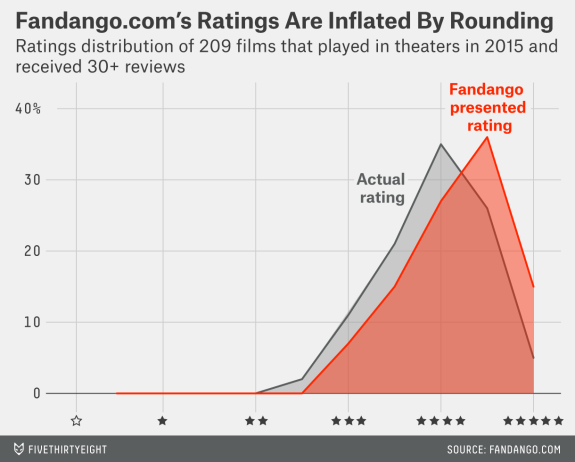

Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

### Understanding the Data

Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

One of Dataquest's team members, [mircealex](https://github.com/mircealex), collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

### Importing the Data

In [1]:
import pandas as pd

fandango_15 = pd.read_csv('fandango_score_comparison.csv')
fandango_16_17 = pd.read_csv('movie_ratings_16_17.csv')

fandango_15.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
fandango_16_17.head(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


We need to sample the population at two different periods in time — before and after Hickey's analysis — so we can compare the two states.

In [3]:
before = fandango_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
after = fandango_16_17[['movie', 'year', 'fandango']].copy()
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


As our goal is to determine wheter there has been any change in Fandango's rating system after Hickey's analysis, the population of interest for our goal is all movie ratings stored on Fandango's website.

But not all the movies have an equal chance to be included in the two samples. 

Hickey included all the movies (released before Aug. 24, 2015) with:
- A Rotten Tomatoes rating
- A RT User rating
- A Metacritic score
- A Metacritic User score
- A IMDb score
- At least 30 fan reviews on Fandango

The 2016 and 2017's movie ratings contains data for 214 of the most popular movies with:
- A significant number of votes (IMDB, Fandango, Metacritic, Rotten Tomatoes)
- Released in 2016 and 2017.
As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

The sampling processes were not random, and the resulting samples are very unlikely to be representative of the population we're interested in describing.

As it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time, we decide to change the goal the goal of our analysis by placing some limitations on it.

### Changing the Goal of our Analysis

We are going to change our population of interest to popular movies in 2015 and 2016 to see if there is any difference between them. 

Our two populations that we want to describe and compare with each other are:
- All Fandango's ratings for popular (more than 30 fan ratings) movies released in 2015.
- All Fandango's ratings for popular (more than 30 fan ratings) movies released in 2016.

### Isolating the Samples We Need

We start checking if both samples contain popular movies (over 30 fan ratings on Fandango's website).

In [5]:
before['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

In [6]:
before['Year']=before['FILM'].str[-5:].str.replace(')','')
movies_15 = before[before['Year']=='2015'].copy()
movies_15.describe()

C:\Users\laura\AppData\Local\Temp\ipykernel_26468\362080115.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  before['Year']=before['FILM'].str[-5:].str.replace(')','')


,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,129.000000,129.000000,129.000000,129.000000
mean,4.085271,3.846512,3761.891473,0.238760
std,0.538096,0.505446,6543.601748,0.152741
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,210.000000,0.100000
50%,4.000000,3.900000,1415.000000,0.200000
75%,4.500000,4.200000,4045.000000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


In [7]:
movies_15.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


`movies_15` will be the 2015's popular movies dataset:
- Total of films: 129
- Minimum of fan votes: 35
- Maximun of fan votes: 34846

In [8]:
movies_16 = after[after['year']==2016].copy()
movies_16.describe()

,year,fandango
count,191.0,191.000000
mean,2016.0,3.887435
std,0.0,0.509540
min,2016.0,2.500000
25%,2016.0,3.500000
50%,2016.0,4.000000
75%,2016.0,4.250000
max,2016.0,5.000000


In [9]:
movies_16.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


`movies_16` will be the 2016's popular movies dataset:
- Total of films: 191

We do not have information about how popular a movie is but we can check random 10 movies on Fandango website to see it.

In [10]:
movies_16.sample(10, random_state = 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


In 2022:

|movie |	year |fandango | **fan ratings**
|---------|----- |-----------|----|
|Collide	|2016	|3.5 | 2500+ |
|Ice Age: Collision Course	|2016	|4.0 | 25000+ |
|Now You See Me 2	|2016	|4.0 | 50000+ |
|The Disappointments Room	|2016	|2.5 | 2500+ |
|Kubo and the Two Strings	|2016	|4.5 | 25000+ |
|Pride and Prejudice and Zombies	|2016|4.0 | 25000+ |
|Deadpool	|2016|	4.5 | 100000+ |
|Money Monster	|2016	|4.0 | 10000+ |
|War Dogs	|2016	|4.0| 25000+ |
|Miracles from Heaven	|2016	|4.5 | 10000+ |

It seems that these movies have been very popular since 2016.

### Comparing Distribution Shapes for 2015 and 2016

Let's start with making a high-level comparison between the shapes of the distributions of movie ratings for both samples. We are going to generate two kernel density plots on the same figure for the distribution of movie ratings of each sample. 

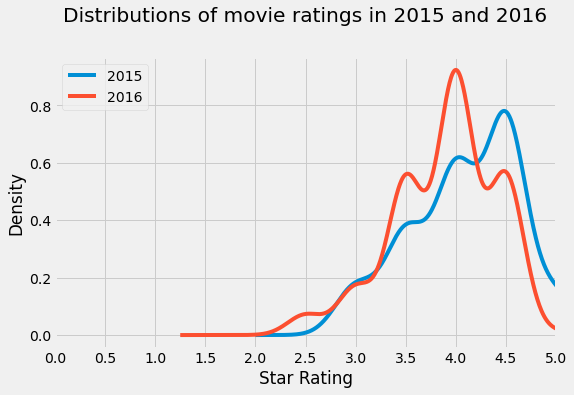

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
movies_15['Fandango_Stars'].plot.kde(label='2015',legend=True, figsize=(8,5))
movies_16['fandango'].plot.kde(label='2016',legend=True)
plt.title('Distributions of movie ratings in 2015 and 2016', y=1.1)
plt.xlabel('Star Rating')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel('Density')
plt.show()

Both distribution show a left skewed distribution, which means that most of movies have a high rating (between 3.5 and 5). 2015 distribution is more left skewed distribuited than 2016's, movies had better ratings in 2015 than in 2016, which corresponds to the Fandango's rating system before Hickey's analysis.

We can conclude that there was a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

### Comparing Relative Frequencies

We are going to analyze more granular information with the frequency distribution tables of the two distributions.

As the samples have not the same number of movies (129 in `movies_15` and 191 in `movies_16`), we are not going to use absolute frequencies. We are going to create the frequency tables normalized and show them as percentages.

In [12]:
movies_15['Fandango_Stars'].value_counts(normalize=True).sort_index().round(4)*100

3.0     8.53
3.5    17.83
4.0    28.68
4.5    37.98
5.0     6.98
Name: Fandango_Stars, dtype: float64

In [13]:
movies_16['fandango'].value_counts(normalize=True).sort_index().round(4)*100

2.5     3.14
3.0     7.33
3.5    24.08
4.0    40.31
4.5    24.61
5.0     0.52
Name: fandango, dtype: float64

We can see again the difference between the two distributions. 37.98% of movies in 2015 were rated with 4.5 stars and 40.31% of movies in 2016 were rated with 4. There also are some movies in 2016 (3.14%) rated with 2.5 stars and none in 2015. 6.98% of movies in 2015 were rated with 5 stars and just the 0.52% in 2016.

### Determining the Direction of the Change

We are going to analyze the direction of the difference taking each distribution of movie ratings and compute its mean, median, and mode.

In [14]:
mean_15 = movies_15['Fandango_Stars'].mean()
median_15 = movies_15['Fandango_Stars'].median()
mode_15 = movies_15['Fandango_Stars'].mode()[0]

mean_16 = movies_16['fandango'].mean()
median_16 = movies_16['fandango'].median()
mode_16 = movies_16['fandango'].mode()[0]

print('2015\nMean: ',mean_15,
      '\nMedian: ',median_15,
      '\nMode: ',mode_15,
      '\n\n2016\nMean: ',mean_16,
      '\nMedian: ',median_16,
      '\nMode: ',mode_16)

2015
Mean:  4.0852713178294575 
Median:  4.0 
Mode:  4.5 

2016
Mean:  3.887434554973822 
Median:  4.0 
Mode:  4.0


The average rating value is slighly higher in 2015 than 2016 (4.08 vs 3.88), the median value is the same for both years and the most repeated value is 4.5 in 2015 and 4.0 in 2016.

In [15]:
summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


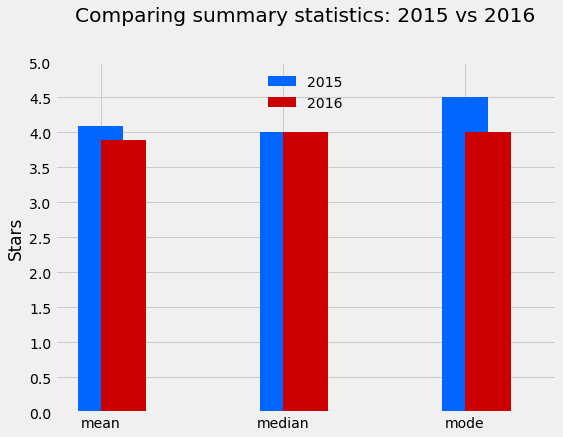

In [16]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25,figsize=(8,6))
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,figsize=(8,6))

plt.title('Comparing summary statistics: 2015 vs 2016', y=1.1)
plt.ylabel('Stars')
plt.xticks(rotation=0)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylim(0,5)
plt.legend(loc='upper center',framealpha = 0)
plt.show()

### Conclusion

Fandango showed movies in 2015 with slightly higher star rates than in 2016. As result of the Hickey's analysis, which found strong evidence to suggest those ratings were biased, Fandango performed some changes to correct them.

We can see that the average rating decreased slightly in 2016 if compared to 2015 as expected.